In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
Id_df = pd.read_csv(r"C:\Users\Shourya Sharma\Desktop\Loan Delinquent Dataset.csv")
print(Id_df.head())

   ID delinquent  Sdelinquent       term  gender purpose home_ownership  \
0   1        Yes            1  36 months  Female   House       Mortgage   
1   2         No            0  36 months  Female   House           Rent   
2   3        Yes            1  36 months  Female   House           Rent   
3   4        Yes            1  36 months  Female     Car       Mortgage   
4   5        Yes            1  36 months  Female   House           Rent   

     age     FICO  
0    >25  300-500  
1  20-25     >500  
2    >25  300-500  
3    >25  300-500  
4    >25  300-500  


In [3]:
Id_df=Id_df.drop(["ID",
                  "delinquent"], axis=1)

In [4]:
Id_df.head()

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,36 months,Female,House,Mortgage,>25,300-500
1,0,36 months,Female,House,Rent,20-25,>500
2,1,36 months,Female,House,Rent,>25,300-500
3,1,36 months,Female,Car,Mortgage,>25,300-500
4,1,36 months,Female,House,Rent,>25,300-500


In [5]:
Id_df.shape

(11548, 7)

In [6]:
Id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sdelinquent     11548 non-null  int64 
 1   term            11548 non-null  object
 2   gender          11548 non-null  object
 3   purpose         11548 non-null  object
 4   home_ownership  11548 non-null  object
 5   age             11548 non-null  object
 6   FICO            11548 non-null  object
dtypes: int64(1), object(6)
memory usage: 631.7+ KB


In [7]:
duplicates = Id_df.duplicated()
print("Number of Duplicate rows= %d" % (duplicates.sum()))

Number of Duplicate rows= 11271


In [8]:
Id_df[duplicates]

,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
4,1,36 months,Female,House,Rent,>25,300-500
13,0,36 months,Male,House,Mortgage,20-25,>500
17,1,36 months,Female,Car,Mortgage,>25,300-500
18,1,36 months,Female,House,Rent,>25,300-500
19,0,36 months,Female,House,Rent,>25,>500
...,...,...,...,...,...,...,...
11543,0,60 months,Male,other,Mortgage,>25,300-500
11544,1,36 months,Male,House,Rent,20-25,300-500
11545,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,1,36 months,Female,House,Rent,20-25,300-500


In [9]:
#since IN DECISION TREE dupicates wont matter

In [10]:
print('term\n',Id_df.term.value_counts() )

print('term\n',Id_df.gender.value_counts() )

print('term\n',Id_df.purpose.value_counts() )

print('term\n',Id_df.home_ownership.value_counts() )

print('term\n',Id_df.age.value_counts() )

print('term\n',Id_df.FICO.value_counts(normalize=True) )


term
 36 months    10589
60 months      959
Name: term, dtype: int64
term
 Male      6555
Female    4993
Name: gender, dtype: int64
term
 House       6892
Car         2080
Other        928
Personal     892
Wedding      408
Medical      266
other         82
Name: purpose, dtype: int64
term
 Mortgage    5461
Rent        5216
Own          871
Name: home_ownership, dtype: int64
term
 20-25    5888
>25      5660
Name: age, dtype: int64
term
 300-500    0.551611
>500       0.448389
Name: FICO, dtype: float64


In [11]:
for feature in Id_df.columns:
    if Id_df[feature].dtype == 'object':  # Check if column is categorical
        print('\n')
        print('Feature:', feature)
        
        # Convert categorical values
        cat_values = pd.Categorical(Id_df[feature].unique())
        print("Categories:", cat_values)
        print("Category Codes:", cat_values.codes)

        # Replace original column with numerical codes
        Id_df[feature] = pd.Categorical(Id_df[feature]).codes



Feature: term
Categories: ['36 months', '60 months']
Categories (2, object): ['36 months', '60 months']
Category Codes: [0 1]


Feature: gender
Categories: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Category Codes: [0 1]


Feature: purpose
Categories: ['House', 'Car', 'Other', 'Personal', 'Wedding', 'Medical', 'other']
Categories (7, object): ['Car', 'House', 'Medical', 'Other', 'Personal', 'Wedding', 'other']
Category Codes: [1 0 3 4 5 2 6]


Feature: home_ownership
Categories: ['Mortgage', 'Rent', 'Own']
Categories (3, object): ['Mortgage', 'Own', 'Rent']
Category Codes: [0 2 1]


Feature: age
Categories: ['>25', '20-25']
Categories (2, object): ['20-25', '>25']
Category Codes: [1 0]


Feature: FICO
Categories: ['300-500', '>500']
Categories (2, object): ['300-500', '>500']
Category Codes: [0 1]


In [12]:
Id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sdelinquent     11548 non-null  int64
 1   term            11548 non-null  int8 
 2   gender          11548 non-null  int8 
 3   purpose         11548 non-null  int8 
 4   home_ownership  11548 non-null  int8 
 5   age             11548 non-null  int8 
 6   FICO            11548 non-null  int8 
dtypes: int64(1), int8(6)
memory usage: 158.0 KB


In [13]:
#PROPRTION OF 1s and 0s

In [14]:
Id_df.Sdelinquent.value_counts(normalize=True)

1    0.668601
0    0.331399
Name: Sdelinquent, dtype: float64

In [15]:
Id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sdelinquent     11548 non-null  int64
 1   term            11548 non-null  int8 
 2   gender          11548 non-null  int8 
 3   purpose         11548 non-null  int8 
 4   home_ownership  11548 non-null  int8 
 5   age             11548 non-null  int8 
 6   FICO            11548 non-null  int8 
dtypes: int64(1), int8(6)
memory usage: 158.0 KB


In [16]:
#extract  the target coloumn into seprate vectors for training set and test set

In [17]:
X = Id_df.drop("Sdelinquent", axis=1)

y = Id_df.pop("Sdelinquent")

X.head()

,term,gender,purpose,home_ownership,age,FICO
0,0,0,1,0,1,0
1,0,0,1,2,0,1
2,0,0,1,2,1,0
3,0,0,0,0,1,0
4,0,0,1,2,1,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [19]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',8083+3465)

X_train (8083, 6)
X_test (3465, 6)
train_labels (8083,)
test_labels (3465,)
Total Obs 11548


In [20]:
#BUILDING A DECISION TREE CLASSIFIER

In [21]:
#INITITALISE THE DECISION TREE
dt_model= DecisionTreeClassifier(criterion='gini')

In [22]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

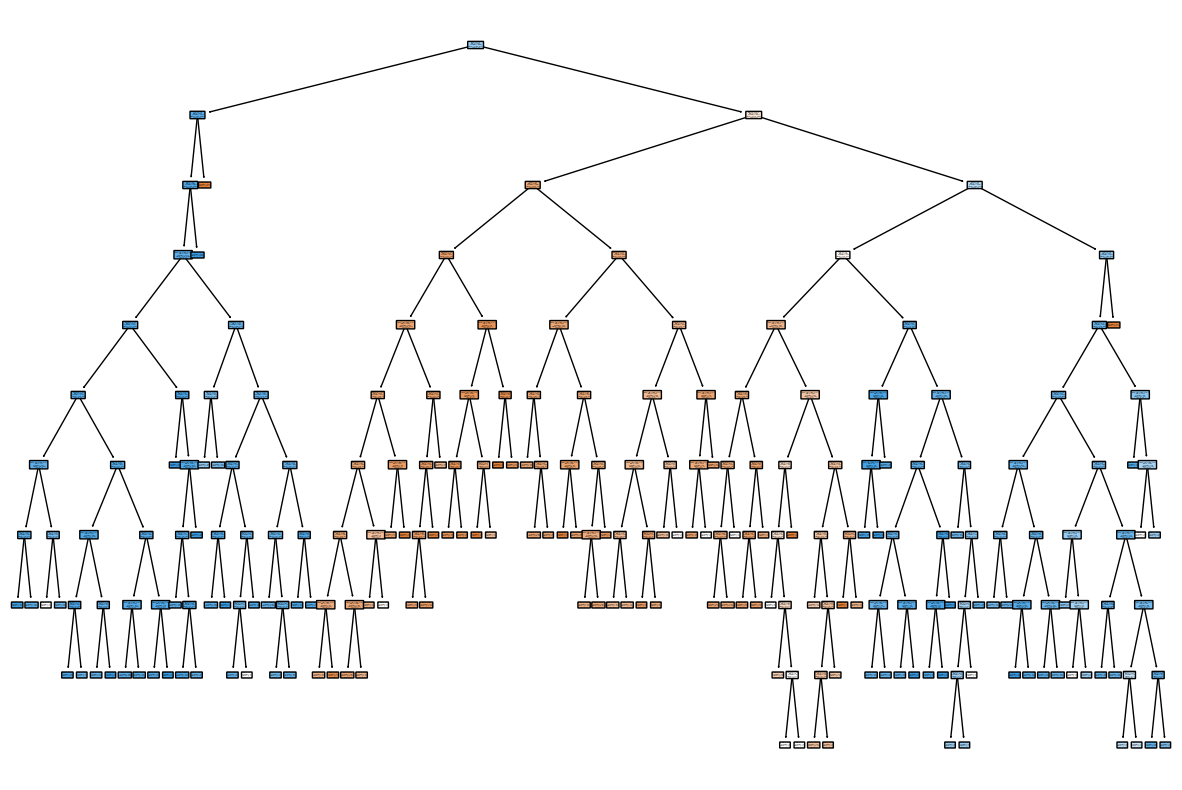

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree

# Train the decision tree model
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, train_labels)

# Plot the tree
plt.figure(figsize=(15, 10))  # Adjust figure size
tree.plot_tree(dt_model, 
               feature_names=X_train.columns,  # Feature names
               class_names=['No', 'Yes'],  # Class labels
               filled=True, 
               rounded=True)

plt.show()  # Display the decision tree


In [25]:
#VARIABLE IMPORTANCE

In [27]:
print(pd.DataFrame(dt_model.feature_importances_, 
                   columns=["Imp"], 
                   index=X_train.columns).sort_values('Imp', ascending=False))

                     Imp
FICO            0.393915
term            0.370052
gender          0.158664
age             0.055813
purpose         0.010924
home_ownership  0.010633


In [28]:
#PREDICITING TEST DATA|

In [29]:
y_predict= dt_model.predict(X_test)

In [30]:
y_predict.shape

(3465,)

In [31]:
#REGULARISING THE DECISION TREE

In [32]:
#ADDING TUNING PARAMETERS

In [33]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30, min_samples_leaf=100, min_samples_split=1000)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000)

In [34]:
#GENERATING NEW TREE

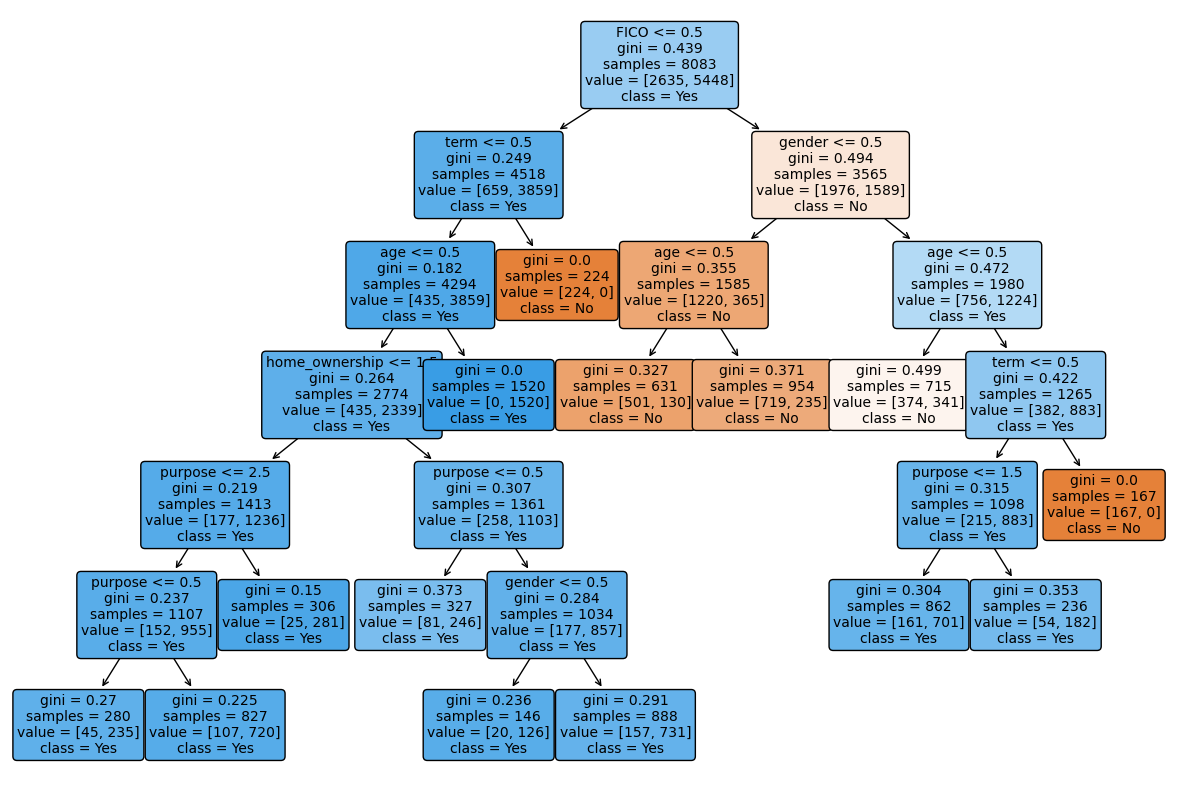

In [37]:
train_char_label = ['No', 'Yes']  # Modify based on your dataset

# Plot the tree using Matplotlib
plt.figure(figsize=(15, 10))  # Adjust the figure size
tree.plot_tree(reg_dt_model, 
               feature_names=X_train.columns,  # Ensure X_train is a DataFrame
               class_names=train_char_label,  # Define this variable before using
               filled=True, rounded=True, fontsize=10)

plt.show()  

In [38]:
#VARIABLE IMPORTANCE 


In [39]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns=["Imp"], index = X_train.columns).sort_values('Imp', ascending=False))

                     Imp
FICO            0.424274
term            0.339141
gender          0.169328
age             0.060114
home_ownership  0.003659
purpose         0.003483


In [40]:
#PREDICTING ON TRAINING AND TEST DATASET

In [42]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [44]:
print('ytrain_predict', ytrain_predict.shape)
print('ytest_predict', ytest_predict.shape)

ytrain_predict (8083,)
ytest_predict (3465,)


In [45]:
ytest_predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [64]:
#getting predicted probabilities
ytest_predict_prob= reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.12938331, 0.87061669],
       [0.        , 1.        ],
       [0.75366876, 0.24633124],
       ...,
       [0.        , 1.        ],
       [0.16071429, 0.83928571],
       [0.22881356, 0.77118644]])

In [48]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.129383,0.870617
1,0.000000,1.000000
2,0.753669,0.246331
3,0.753669,0.246331
4,0.136986,0.863014


In [49]:
#MEASUING AUC-ROC CURVE

In [50]:
import matplotlib.pyplot as plt

AUC: 0.879


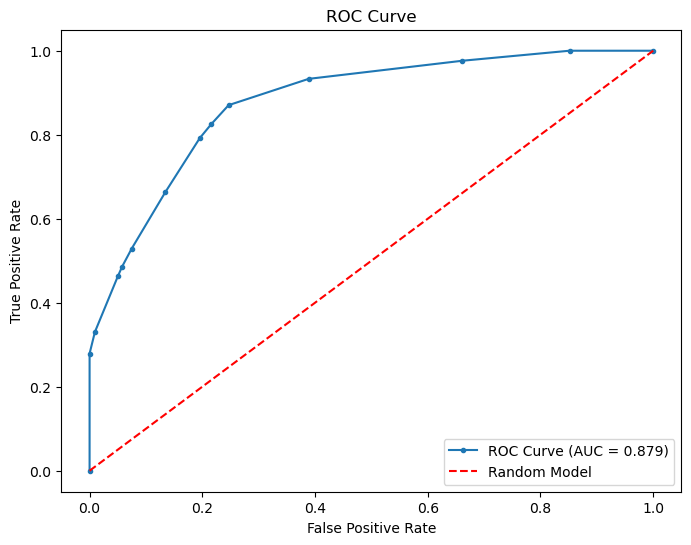

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities
probs = reg_dt_model.predict_proba(X_train)

# Keep probabilities for the positive class only
probs = probs[:, 1]

# Calculate AUC (Area Under Curve)
auc = roc_auc_score(train_labels, probs)
print(f'AUC: {auc:.3f}')  # Print AUC score with 3 decimal places

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {auc:.3f})')  # Add AUC to legend
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Model')  # Diagonal baseline

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Show plot
plt.show()


AUC: 0.879


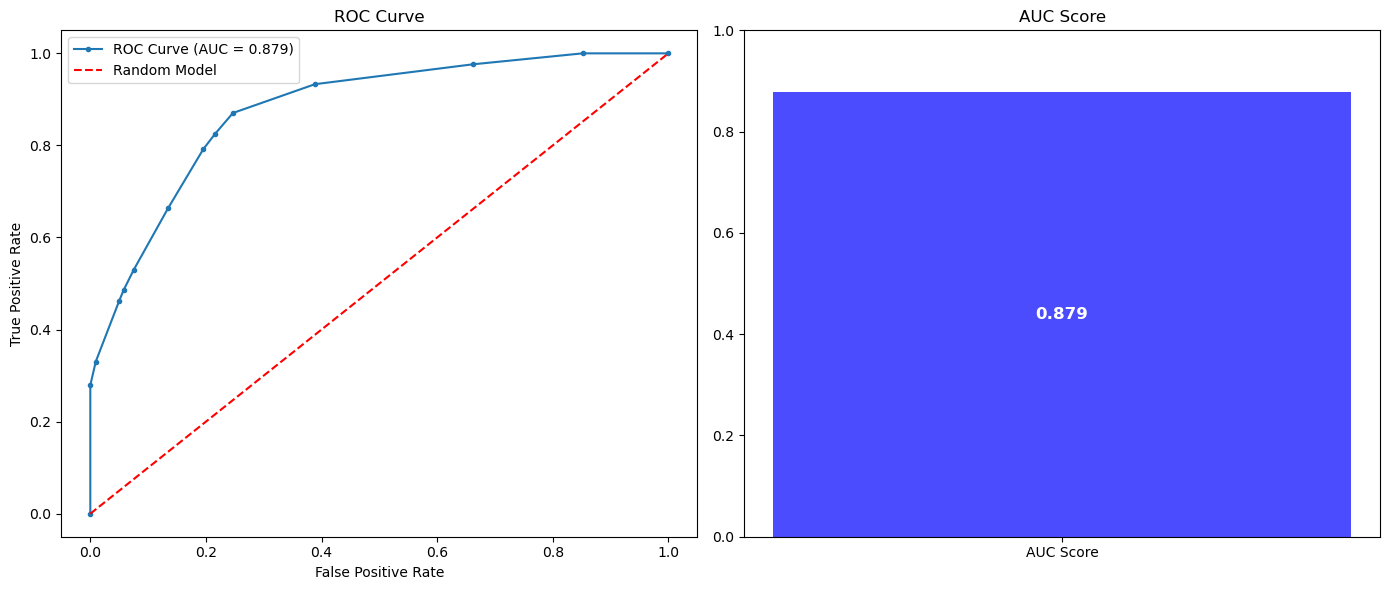

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities
probs = reg_dt_model.predict_proba(X_train)

# Keep probabilities for the positive class only
probs = probs[:, 1]

# Calculate AUC (Area Under Curve)
auc = roc_auc_score(train_labels, probs)
print(f'AUC: {auc:.3f}')  # Print AUC score with 3 decimal places

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)

# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC curve (Left Side)
ax[0].plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {auc:.3f})')
ax[0].plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Model')  # Diagonal baseline
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve')
ax[0].legend()

# Plot AUC bar chart (Right Side)
ax[1].bar(['AUC Score'], [auc], color='blue', alpha=0.7)
ax[1].set_ylim([0, 1])  # AUC is between 0 and 1
ax[1].set_title('AUC Score')
ax[1].text(0, auc / 2, f"{auc:.3f}", ha='center', va='center', fontsize=12, color='white', weight='bold')

# Show both plots
plt.tight_layout()
plt.show()


In [53]:
#CONFUSION MATRIX FOR THE TRAINING DATA

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
confusion_matrix(train_labels, ytrain_predict)

array([[1985,  650],
       [ 706, 4742]], dtype=int64)

In [56]:
#train data accuracy

In [57]:
reg_dt_model.score(X_train, train_labels)

0.832240504763083

In [58]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      2635
           1       0.88      0.87      0.87      5448

    accuracy                           0.83      8083
   macro avg       0.81      0.81      0.81      8083
weighted avg       0.83      0.83      0.83      8083



In [59]:
#CONFUSION MATRIX FOR TEST DATA

In [60]:
confusion_matrix(train_labels, ytrain_predict)

array([[1985,  650],
       [ 706, 4742]], dtype=int64)

In [63]:
reg_dt_model.score(X_test,test_labels)

0.8262626262626263